In [8]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_validate, RandomizedSearchCV, validation_curve, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

warnings.simplefilter(action='ignore', category=Warning)

pd.set_option("display.max_columns", None)
#pd.set_option("display.max_rows", None)
#pd.set_option("display.float_format", lambda x: '%.3f' % x)
#pd.set_option("display.width", 500)


from funcs.data_prep import *
from funcs.eda import *

In [9]:
df = pd.read_csv("datasets/train.csv")

In [10]:
check_df(df)

##################### Shape #####################
(1460, 81)
##################### Types #####################
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object
##################### Info #####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   

In [11]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 1460
Variables: 81
cat_cols: 53
num_cols: 27
cat_but_car: 1
num_but_cat: 11


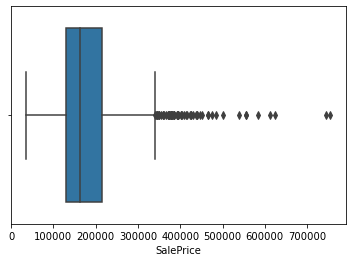

In [12]:
sns.boxplot(df["SalePrice"])

In [13]:
df.shape

(1460, 81)

In [14]:
df_copy = df[df["SalePrice"] < 295000]

In [15]:
df_copy.shape

(1341, 81)

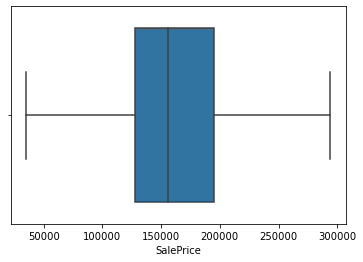

In [16]:
sns.boxplot(df_copy["SalePrice"])

In [17]:
missing_val = missing_values_table(df_copy, na_name=True)

              n_miss  ratio
PoolQC          1335  99.55
MiscFeature     1287  95.97
Alley           1250  93.21
Fence           1065  79.42
FireplaceQu      686  51.16
LotFrontage      249  18.57
GarageYrBlt       81   6.04
GarageType        81   6.04
GarageFinish      81   6.04
GarageQual        81   6.04
GarageCond        81   6.04
BsmtFinType2      38   2.83
BsmtExposure      38   2.83
BsmtFinType1      37   2.76
BsmtCond          37   2.76
BsmtQual          37   2.76
MasVnrArea         7   0.52
MasVnrType         7   0.52
Electrical         1   0.07


In [18]:
missing_vs_target(df_copy, "SalePrice", missing_val)

                       TARGET_MEAN  Count
LotFrontage_NA_FLAG                      
0                    161300.397436   1092
1                    175035.337349    249


                 TARGET_MEAN  Count
Alley_NA_FLAG                      
0              142845.912088     91
1              165379.884000   1250


                      TARGET_MEAN  Count
MasVnrType_NA_FLAG                      
0                   163640.898801   1334
1                   203839.142857      7


                      TARGET_MEAN  Count
MasVnrArea_NA_FLAG                      
0                   163640.898801   1334
1                   203839.142857      7


                    TARGET_MEAN  Count
BsmtQual_NA_FLAG                      
0                 165502.052147   1304
1                 105652.891892     37


                    TARGET_MEAN  Count
BsmtCond_NA_FLAG                      
0                 165502.052147   1304
1                 105652.891892     37


                        TARGET_MEAN 

In [19]:
for col in num_cols:
    replace_with_thresholds(df_copy, col)

## Missing Values

### Alley

In [20]:
df_copy["Alley"] = df_copy["Alley"].fillna("no_connect")

In [21]:
df_copy["NEW_CONNECT_ALLEY"] = [1 if i != "no_connect" else 0 for i in df_copy["Alley"]]

In [22]:
df_copy.drop("Id", axis=1, inplace=True)

In [23]:
df_copy.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,NEW_CONNECT_ALLEY
0,60.0,RL,65.0,8450.0,Pave,no_connect,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5,2003.0,2003.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856.0,854.0,0.0,1710.0,1,0,2,1,3,1,Gd,8.0,Typ,0,NaN,Attchd,2003.0,RFn,2,548.0,TA,TA,Y,0.0,61.0,0.0,0.0,0.0,0,NaN,NaN,NaN,0.0,2.0,2008,WD,Normal,208500.0,0
1,20.0,RL,80.0,9600.0,Pave,no_connect,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6.0,8,1976.0,1976.0,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262.0,0.0,0.0,1262.0,0,1,2,0,3,1,TA,6.0,Typ,1,TA,Attchd,1976.0,RFn,2,460.0,TA,TA,Y,298.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,0.0,5.0,2007,WD,Normal,181500.0,0
2,60.0,RL,68.0,11250.0,Pave,no_connect,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5,2001.0,2002.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920.0,866.0,0.0,1786.0,1,0,2,1,3,1,Gd,6.0,Typ,1,TA,Attchd,2001.0,RFn,2,608.0,TA,TA,Y,0.0,42.0,0.0,0.0,0.0,0,NaN,NaN,NaN,0.0,9.0,2008,WD,Normal,223500.0,0
3,70.0,RL,60.0,9550.0,Pave,no_connect,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7.0,5,1915.0,1970.0,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961.0,756.0,0.0,1717.0,1,0,1,0,3,1,Gd,7.0,Typ,1,Gd,Detchd,1998.0,Unf,3,642.0,TA,TA,Y,0.0,35.0,0.0,0.0,0.0,0,NaN,NaN,NaN,0.0,2.0,2006,WD,Abnorml,140000.0,0
4,60.0,RL,84.0,14260.0,Pave,no_connect,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8.0,5,2000.0,2000.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,306.875,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145.0,1053.0,0.0,2198.0,1,0,2,1,4,1,Gd,9.0,Typ,1,TA,Attchd,2000.0,RFn,3,836.0,TA,TA,Y,192.0,84.0,0.0,0.0,0.0,0,NaN,NaN,NaN,0.0,12.0,2008,WD,Normal,250000.0,0


### LotFrontage

In [24]:
df_copy["LotFrontage"] = df_copy["LotFrontage"].fillna(0)

In [25]:
df_copy["NEW_CONNECT_STREET"] = [1 if i > 0 else 0 for i in df_copy["LotFrontage"]]

### FireplaceQu

In [26]:
df_copy["FireplaceQu"] = df_copy["FireplaceQu"].fillna("NO_FIREPLACE")

In [27]:
df_copy["NEW_HAVE_FIREPLACE"] = [1 if i != "NO_FIREPLACE" else 0 for i in df_copy["FireplaceQu"]]

In [28]:
df_copy.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,NEW_CONNECT_ALLEY,NEW_CONNECT_STREET,NEW_HAVE_FIREPLACE
0,60.0,RL,65.0,8450.0,Pave,no_connect,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5,2003.0,2003.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856.0,854.0,0.0,1710.0,1,0,2,1,3,1,Gd,8.0,Typ,0,NO_FIREPLACE,Attchd,2003.0,RFn,2,548.0,TA,TA,Y,0.0,61.0,0.0,0.0,0.0,0,NaN,NaN,NaN,0.0,2.0,2008,WD,Normal,208500.0,0,1,0
1,20.0,RL,80.0,9600.0,Pave,no_connect,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6.0,8,1976.0,1976.0,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262.0,0.0,0.0,1262.0,0,1,2,0,3,1,TA,6.0,Typ,1,TA,Attchd,1976.0,RFn,2,460.0,TA,TA,Y,298.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,0.0,5.0,2007,WD,Normal,181500.0,0,1,1
2,60.0,RL,68.0,11250.0,Pave,no_connect,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5,2001.0,2002.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920.0,866.0,0.0,1786.0,1,0,2,1,3,1,Gd,6.0,Typ,1,TA,Attchd,2001.0,RFn,2,608.0,TA,TA,Y,0.0,42.0,0.0,0.0,0.0,0,NaN,NaN,NaN,0.0,9.0,2008,WD,Normal,223500.0,0,1,1
3,70.0,RL,60.0,9550.0,Pave,no_connect,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7.0,5,1915.0,1970.0,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961.0,756.0,0.0,1717.0,1,0,1,0,3,1,Gd,7.0,Typ,1,Gd,Detchd,1998.0,Unf,3,642.0,TA,TA,Y,0.0,35.0,0.0,0.0,0.0,0,NaN,NaN,NaN,0.0,2.0,2006,WD,Abnorml,140000.0,0,1,1
4,60.0,RL,84.0,14260.0,Pave,no_connect,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8.0,5,2000.0,2000.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,306.875,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145.0,1053.0,0.0,2198.0,1,0,2,1,4,1,Gd,9.0,Typ,1,TA,Attchd,2000.0,RFn,3,836.0,TA,TA,Y,192.0,84.0,0.0,0.0,0.0,0,NaN,NaN,NaN,0.0,12.0,2008,WD,Normal,250000.0,0,1,1


### Garages

In [29]:
df_copy[["GarageType", "GarageFinish", "GarageQual", "GarageCond"]] = df_copy[["GarageType", "GarageFinish", "GarageQual", "GarageCond"]].fillna("NO_GARAGE")

In [30]:
df_copy["NEW_HAVE_GARAGE"] = [1 if "NO_GARAGE" not in i else 0 for i in df_copy["GarageType"]]

In [31]:
df_copy["GarageYrBlt"] = df_copy["GarageYrBlt"].fillna(0)

### Pool

In [32]:
df_copy["PoolQC"] = df_copy["PoolQC"].fillna("NO_POOL")

In [33]:
df_copy["NEW_HAVE_POOL"] = [1 if i != "NO_POOL" else 0 for i in df_copy["PoolQC"]]

### Fence

In [34]:
df_copy["Fence"] = df_copy["Fence"].fillna("NO_FENCE")

In [35]:
df_copy["NEW_HAVE_FENCE"] = [1 if i != "NO_FENCE" else 0 for i in df_copy["Fence"]]

In [36]:
df_copy.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,NEW_CONNECT_ALLEY,NEW_CONNECT_STREET,NEW_HAVE_FIREPLACE,NEW_HAVE_GARAGE,NEW_HAVE_POOL,NEW_HAVE_FENCE
0,60.0,RL,65.0,8450.0,Pave,no_connect,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5,2003.0,2003.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856.0,854.0,0.0,1710.0,1,0,2,1,3,1,Gd,8.0,Typ,0,NO_FIREPLACE,Attchd,2003.0,RFn,2,548.0,TA,TA,Y,0.0,61.0,0.0,0.0,0.0,0,NO_POOL,NO_FENCE,NaN,0.0,2.0,2008,WD,Normal,208500.0,0,1,0,1,0,0
1,20.0,RL,80.0,9600.0,Pave,no_connect,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6.0,8,1976.0,1976.0,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262.0,0.0,0.0,1262.0,0,1,2,0,3,1,TA,6.0,Typ,1,TA,Attchd,1976.0,RFn,2,460.0,TA,TA,Y,298.0,0.0,0.0,0.0,0.0,0,NO_POOL,NO_FENCE,NaN,0.0,5.0,2007,WD,Normal,181500.0,0,1,1,1,0,0
2,60.0,RL,68.0,11250.0,Pave,no_connect,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5,2001.0,2002.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920.0,866.0,0.0,1786.0,1,0,2,1,3,1,Gd,6.0,Typ,1,TA,Attchd,2001.0,RFn,2,608.0,TA,TA,Y,0.0,42.0,0.0,0.0,0.0,0,NO_POOL,NO_FENCE,NaN,0.0,9.0,2008,WD,Normal,223500.0,0,1,1,1,0,0
3,70.0,RL,60.0,9550.0,Pave,no_connect,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7.0,5,1915.0,1970.0,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961.0,756.0,0.0,1717.0,1,0,1,0,3,1,Gd,7.0,Typ,1,Gd,Detchd,1998.0,Unf,3,642.0,TA,TA,Y,0.0,35.0,0.0,0.0,0.0,0,NO_POOL,NO_FENCE,NaN,0.0,2.0,2006,WD,Abnorml,140000.0,0,1,1,1,0,0
4,60.0,RL,84.0,14260.0,Pave,no_connect,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8.0,5,2000.0,2000.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,306.875,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145.0,1053.0,0.0,2198.0,1,0,2,1,4,1,Gd,9.0,Typ,1,TA,Attchd,2000.0,RFn,3,836.0,TA,TA,Y,192.0,84.0,0.0,0.0,0.0,0,NO_POOL,NO_FENCE,NaN,0.0,12.0,2008,WD,Normal,250000.0,0,1,1,1,0,0


### Bsmt

In [37]:
df_copy[["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]] = df_copy[["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]].fillna("NO_BSMT")

In [38]:
df_copy["NEW_HAVE_BASEMENT"] = [1 if i != "NO_BSMT" else 0 for i in df_copy["BsmtExposure"]]

In [39]:
df_copy.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,NEW_CONNECT_ALLEY,NEW_CONNECT_STREET,NEW_HAVE_FIREPLACE,NEW_HAVE_GARAGE,NEW_HAVE_POOL,NEW_HAVE_FENCE,NEW_HAVE_BASEMENT
0,60.0,RL,65.0,8450.0,Pave,no_connect,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5,2003.0,2003.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856.0,854.0,0.0,1710.0,1,0,2,1,3,1,Gd,8.0,Typ,0,NO_FIREPLACE,Attchd,2003.0,RFn,2,548.0,TA,TA,Y,0.0,61.0,0.0,0.0,0.0,0,NO_POOL,NO_FENCE,NaN,0.0,2.0,2008,WD,Normal,208500.0,0,1,0,1,0,0,1
1,20.0,RL,80.0,9600.0,Pave,no_connect,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6.0,8,1976.0,1976.0,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262.0,0.0,0.0,1262.0,0,1,2,0,3,1,TA,6.0,Typ,1,TA,Attchd,1976.0,RFn,2,460.0,TA,TA,Y,298.0,0.0,0.0,0.0,0.0,0,NO_POOL,NO_FENCE,NaN,0.0,5.0,2007,WD,Normal,181500.0,0,1,1,1,0,0,1
2,60.0,RL,68.0,11250.0,Pave,no_connect,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5,2001.0,2002.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920.0,866.0,0.0,1786.0,1,0,2,1,3,1,Gd,6.0,Typ,1,TA,Attchd,2001.0,RFn,2,608.0,TA,TA,Y,0.0,42.0,0.0,0.0,0.0,0,NO_POOL,NO_FENCE,NaN,0.0,9.0,2008,WD,Normal,223500.0,0,1,1,1,0,0,1
3,70.0,RL,60.0,9550.0,Pave,no_connect,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7.0,5,1915.0,1970.0,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961.0,756.0,0.0,1717.0,1,0,1,0,3,1,Gd,7.0,Typ,1,Gd,Detchd,1998.0,Unf,3,642.0,TA,TA,Y,0.0,35.0,0.0,0.0,0.0,0,NO_POOL,NO_FENCE,NaN,0.0,2.0,2006,WD,Abnorml,140000.0,0,1,1,1,0,0,1
4,60.0,RL,84.0,14260.0,Pave,no_connect,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8.0,5,2000.0,2000.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,306.875,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145.0,1053.0,0.0,2198.0,1,0,2,1,4,1,Gd,9.0,Typ,1,TA,Attchd,2000.0,RFn,3,836.0,TA,TA,Y,192.0,84.0,0.0,0.0,0.0,0,NO_POOL,NO_FENCE,NaN,0.0,12.0,2008,WD,Normal,250000.0,0,1,1,1,0,0,1


### Misc

In [40]:
df_copy["MiscFeature"].isnull().sum()

1287

misc feature değişkeninde çok az miktarda miscfeature bulunan ev var dolayısıyla bu değişkeni silip deneyeceğim

In [41]:
df_copy.drop("MiscFeature", axis=1, inplace=True)

In [42]:
df_copy = df_copy.dropna()

In [43]:
df_copy.isnull().sum()

MSSubClass            0
MSZoning              0
LotFrontage           0
LotArea               0
Street                0
                     ..
NEW_HAVE_FIREPLACE    0
NEW_HAVE_GARAGE       0
NEW_HAVE_POOL         0
NEW_HAVE_FENCE        0
NEW_HAVE_BASEMENT     0
Length: 86, dtype: int64

## Encoding

In [44]:
cat_cols, num_cols, cat_but_car = grab_col_names(df_copy)

Observations: 1333
Variables: 86
cat_cols: 67
num_cols: 18
cat_but_car: 1
num_but_cat: 26


In [45]:
df_encode = one_hot_encoder(df_copy, cat_cols)
df_encode = one_hot_encoder(df_encode, cat_but_car)

## Model

In [46]:
y = df_encode["SalePrice"]
X = df_encode.drop("SalePrice", axis=1)

In [47]:
rf_regressor = RandomForestRegressor(random_state=10)

In [63]:
cv_results = cross_validate(rf_regressor, X, y, cv=5, scoring=["neg_root_mean_squared_error", "r2"])

In [64]:
print("RMSE: ", -cv_results["test_neg_root_mean_squared_error"].mean())
print("R2: ", cv_results["test_r2"].mean())

RMSE:  20222.610819438098
R2:  0.8464868181699867


In [52]:
rf_regressor.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 10,
 'verbose': 0,
 'warm_start': False}

In [59]:
rf_regressor_params = {"max_depth": [None, 5, 10, 15], 
                       "min_samples_split": [2, 4, 6, 8], 
                       "n_estimators": [100, 300, 500]}

In [60]:
rf_regressor_best_grid = GridSearchCV(rf_regressor, rf_regressor_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 15.1min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 19.6min finished


In [61]:
rf_regressor_best_grid.best_params_

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 500}

In [62]:
rf_reg_final = rf_regressor.set_params(**rf_regressor_best_grid.best_params_, random_state=42)

In [65]:
cv_results = cross_validate(rf_reg_final, X, y, cv=5, scoring=["neg_root_mean_squared_error", "r2"])

In [66]:
print("RMSE: ", -cv_results["test_neg_root_mean_squared_error"].mean())
print("R2: ", cv_results["test_r2"].mean())

RMSE:  20222.610819438098
R2:  0.8464868181699867
